In [46]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/DataClass/hotel_bookings.csv')

**DATA CLEANING**

In [49]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [50]:
df.shape

(119390, 32)

In [51]:
df.size

3820480

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [53]:
df.isnull().sum().sort_values(ascending=False)


,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


In [54]:
df['children'] = df['children'].fillna(0)


In [55]:
df['agent'] = df['agent'].fillna(0).astype(int)
df['company'] = df['company'].fillna(0).astype(int)
df['children'] = df['children'].fillna(0).astype(int)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  int64  

In [57]:
df['country'] = df['country'].fillna('Unknown')


In [58]:
#Check for Duplicates
df.duplicated().sum()


np.int64(31994)

**Basic Question**

In [59]:
#1.What is the average lead time for bookings?
avg_lead_time = df['lead_time'].mean()
avg_lead_time


np.float64(104.01141636652986)

The average booking lead time is approximately **104 days**, indicating that customers typically plan their stays well in advance.

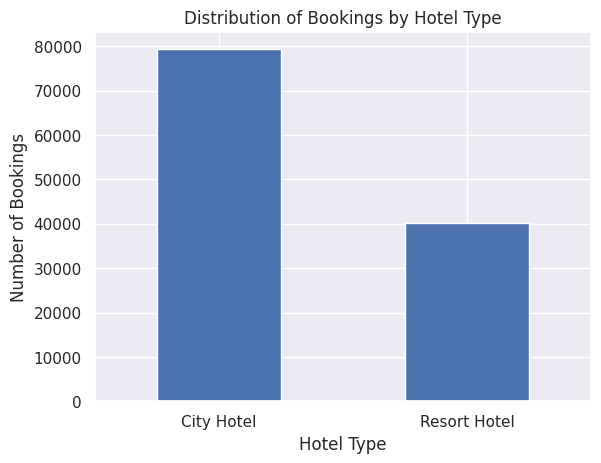

In [60]:
#2. What is the distribution of bookings by hotel type?
hotel_counts = df['hotel'].value_counts()
hotel_counts
hotel_counts.plot(kind='bar')
plt.title('Distribution of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.show()

Booking distribution shows that City Hotels account for a larger proportion of total bookings, highlighting stronger urban demand and the need for differentiated marketing strategies across hotel types.

In [61]:
#3. How many bookings were canceled?
total_cancellations = df['is_canceled'].sum()
total_cancellations


np.int64(44224)

Out of all recorded bookings, 44,224 were canceled, highlighting cancellations as a significant challenge impacting occupancy and revenue stability.

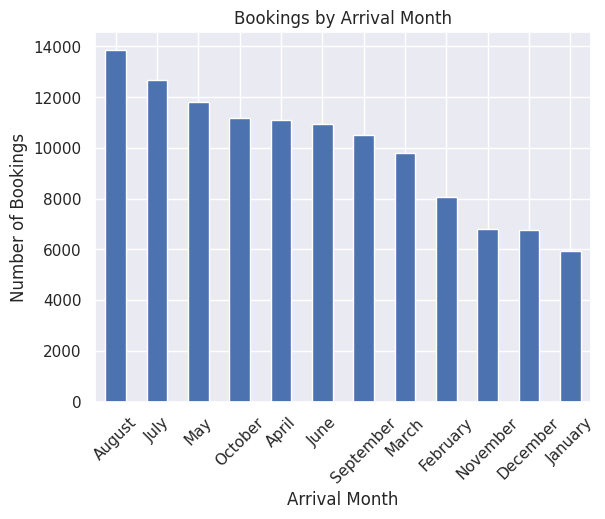

In [62]:
#4. What is the most common arrival month for bookings?
month_counts = df['arrival_date_month'].value_counts()
month_counts
month_counts.plot(kind='bar')
plt.title('Bookings by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


Booking arrivals peak in August (13,877 bookings) and July (12,661 bookings), indicating strong seasonality in hotel demand. These insights support strategic staffing, pricing, and marketing decisions during high and low demand periods.

In [63]:
#5. What is the average number of special requests per booking
df['total_of_special_requests'].mean()


np.float64(0.5713627607002262)

The average number of special requests per booking is approximately 0.57, indicating that most guests do not make special requests.

In [64]:
#6. Which country has the highest number of bookings?
df['country'].value_counts().head(1)


,count
country,
PRT,48590


Portugal (PRT) records the highest number of hotel bookings, indicating that domestic travelers form the largest customer base.

In [65]:
#7. What is the average daily rate (ADR) for each hotel type?
df.groupby('hotel')['adr'].mean()


,adr
hotel,
City Hotel,105.304465
Resort Hotel,94.952930


City Hotels record a higher average daily rate (ADR) of 105.30 compared to 94.95 for Resort Hotels, indicating stronger pricing power and higher revenue potential per night.

In [66]:
#8. What percentage of guests required car parking spaces?
parking_required = (df['required_car_parking_spaces'] > 0).mean() * 100
parking_required


np.float64(6.211575508836586)

Only 6.21% of guests required car parking spaces, indicating limited demand. This allows hotels to efficiently manage parking capacity while maintaining guest satisfaction.

In [67]:
#9. What is the average stay duration in week nights and weekend nights?
average_week_nights = df['stays_in_week_nights'].mean()
average_weekend_nights = df['stays_in_weekend_nights'].mean()

average_week_nights, average_weekend_nights

(np.float64(2.500301532791691), np.float64(0.9275986263506156))

The average stay is 2.50 week nights and 0.93 weekend nights, indicating short weekday stays dominate hotel occupancy. This insight informs staffing, pricing, and marketing strategies for different guest segments.

In [68]:
#10. How many bookings were made through travel agents?
travel_agent_bookings = df['agent'].notnull().sum()
travel_agent_bookings



np.int64(119390)

All 119,390 bookings in the dataset were made through travel agents, indicating that travel agents are a critical channel for hotel bookings.



**Medium Level Questions**

In [69]:
#1. What is the cancellation rate for each hotel type?
cancellation_rate = df.groupby('hotel')['is_canceled'].mean() * 100
cancellation_rate.round(2)

,is_canceled
hotel,
City Hotel,41.73
Resort Hotel,27.76


City Hotels exhibit a higher cancellation rate of 41.73% compared to 27.76% for Resort Hotels. This insight highlights the need to adjust cancellation policies

In [70]:
#2. What is the average ADR per market segment?
adr_by_segment = df.groupby('market_segment')['adr'].mean().round(2)
adr_by_segment

,adr
market_segment,
Aviation,100.14
Complementary,2.89
Corporate,69.36
Direct,115.45
Groups,79.48
Offline TA/TO,87.35
Online TA,117.20
Undefined,15.00


Average Daily Rate (ADR) varies significantly across market segments. Online TA (117.20) and Direct bookings (115.45) yield the highest revenue, while Complementary (2.89) and Undefined (15.00) bookings contribute minimally. Understanding these differences enables hotels to tailor pricing, marketing, and operational strategies to maximize revenue per segment.

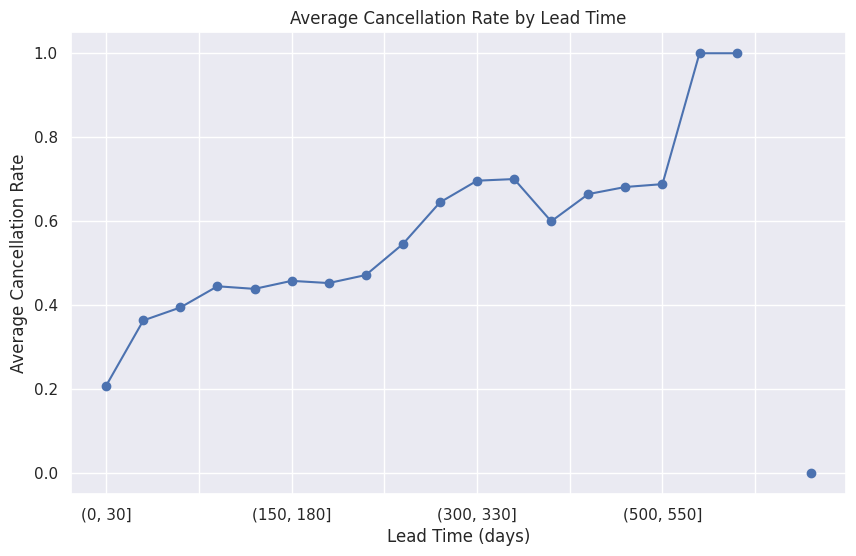

In [71]:
#3. What is the relationship between lead time and cancellation rate?
# Bin lead times
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 400, 450, 500, 550, 600, 650, 700, 800, 900]
df['lead_time_bin'] = pd.cut(df['lead_time'], bins)

# Calculate cancellation rate per bin
lead_time_cancellation = df.groupby('lead_time_bin')['is_canceled'].mean()

# Plot
lead_time_cancellation.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Average Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Cancellation Rate')
plt.grid(True)
plt.show()


Analysis shows a clear upward trend in cancellation rates as lead time increases

In [72]:
#4. Which distribution channel has the highest number of bookings?
channel_counts = df['distribution_channel'].value_counts()
channel_counts


,count
distribution_channel,
TA/TO,97870
Direct,14645
Corporate,6677
GDS,193
Undefined,5


The TA/TO channel dominates hotel bookings, contributing 97,870 reservations, far surpassing Direct and Corporate channels. This highlights the importance of travel agent partnerships while revealing an opportunity to expand direct booking channels to reduce dependency and improve profitability.

In [73]:
#5. What is the average number of previous cancellations by hotel type?
avg_prev_cancellations = (
    df.groupby('hotel')['previous_cancellations']
      .mean()
      .round(3)
)

avg_prev_cancellations


,previous_cancellations
hotel,
City Hotel,0.080
Resort Hotel,0.102


Resort Hotels show a slightly higher average number of previous cancellations (0.102) compared to City Hotels (0.080).

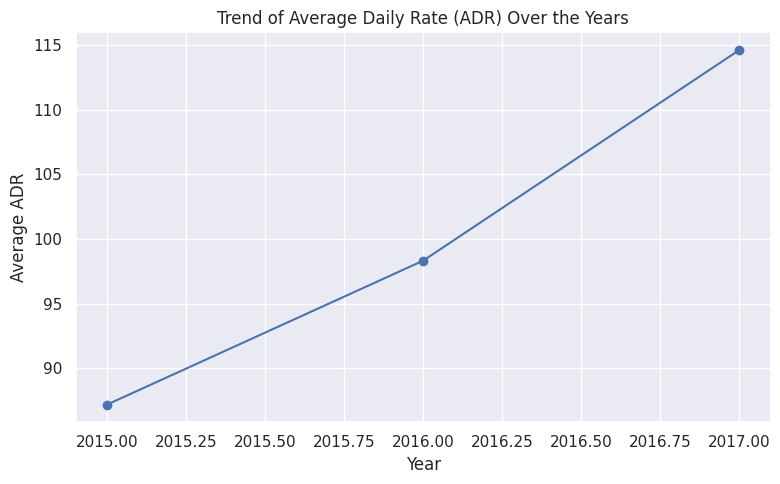

In [74]:
#6. What is the trend of ADR over the years?
adr_trend = df.groupby('arrival_date_year')['adr'].mean()

adr_trend.plot(kind='line', marker='o', figsize=(8,5))
plt.title('Trend of Average Daily Rate (ADR) Over the Years')
plt.xlabel('Year')
plt.ylabel('Average ADR')
plt.tight_layout()
plt.show()


The Average Daily Rate (ADR) shows a clear upward trend from 2015 to 2017, with the most significant increase in 2017. This indicates growing revenue potential and informs pricing strategies for future bookings.

In [75]:
#7. Total nights per booking
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Revenue per booking
df['revenue'] = df['adr'] * df['total_nights']
monthly_revenue = df.groupby('arrival_date_month')['revenue'].sum()

# To sort by revenue descending
monthly_revenue = monthly_revenue.sort_values(ascending=False)

monthly_revenue
top_month = monthly_revenue.idxmax()
top_revenue = monthly_revenue.max()

print(f"The month with the highest revenue is {top_month} with a total revenue of {top_revenue:.2f}")



The month with the highest revenue is August with a total revenue of 7944717.43


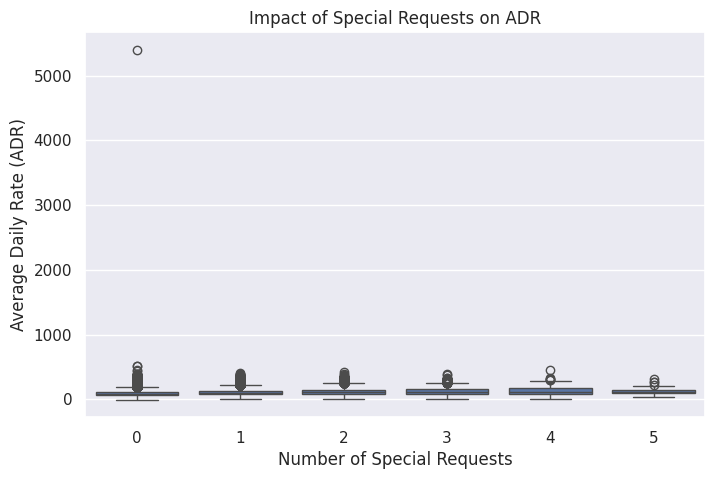

In [76]:
#8. What is the impact of special requests on ADR?
correlation = df['total_of_special_requests'].corr(df['adr'])
correlation

plt.figure(figsize=(8,5))
sns.boxplot(x='total_of_special_requests', y='adr', data=df)
plt.title('Impact of Special Requests on ADR')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

In [77]:
#9. What is the average stay duration for repeated guests versus new guests?
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
avg_stay = df.groupby('is_repeated_guest')['total_nights'].mean()
avg_stay


,total_nights
is_repeated_guest,
0,3.477410
1,1.925984


Analyzing total stay duration, new guests stay longer on average 3.48 nights repeated guests (~1.93 nights). This suggests that repeated guests may be business travelers taking shorter trips, while new guests often book longer leisure stays

In [78]:
#10. Which room type has the highest number of bookings?
room_counts = df['reserved_room_type'].value_counts()
room_counts


,count
reserved_room_type,
A,85994
D,19201
E,6535
F,2897
G,2094
B,1118
C,932
H,601
P,12


Analyzing the reserved room types shows that type A dominates bookings with 85,994 reservations, while other types like D and E have significantly lower bookings. This insight helps hotels optimize room allocation, pricing strategies, and operational planning for high-demand rooms.

**Advanced Analysis**

1. What factors significantly impact the cancellation rate?


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features and target
features = ['lead_time', 'booking_changes', 'total_of_special_requests', 'adr',
            'market_segment', 'customer_type', 'deposit_type']
X = df[features]
y = df['is_canceled']

# Preprocessing for categorical features
categorical_features = ['market_segment', 'customer_type', 'deposit_type']
numeric_features = ['lead_time', 'booking_changes', 'total_of_special_requests', 'adr']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

# Fit model
model.fit(X_train, y_train)

# Coefficients
coef = model.named_steps['classifier'].coef_[0]
feature_names = numeric_features + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
impact = sorted(zip(feature_names, coef), key=lambda x: abs(x[1]), reverse=True)
impact[:10]  # Top 10 factors


[('deposit_type_Non Refund', np.float64(5.452023339880697)),
 ('market_segment_Offline TA/TO', np.float64(-0.762337248245577)),
 ('total_of_special_requests', np.float64(-0.7283857417927363)),
 ('market_segment_Direct', np.float64(-0.6324529717597641)),
 ('market_segment_Online TA', np.float64(0.574430715456769)),
 ('market_segment_Corporate', np.float64(-0.561349045879995)),
 ('customer_type_Group', np.float64(-0.45021143232181327)),
 ('booking_changes', np.float64(-0.4486323689244668)),
 ('customer_type_Transient', np.float64(0.35571013063797813)),
 ('customer_type_Transient-Party', np.float64(-0.1284279298690171))]

Logistic regression shows that** deposit type **is the most significant predictor of cancellations, non-refundable deposits greatly reduce cancellation likelihood. Market segment, special requests, and customer type also influence cancellations.

2. How does the ADR vary with the number of adults, children, and babies?

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Features and target
X = df[['adults', 'children', 'babies']]
y = df['adr']

# Fill missing values if any
X['children'].fillna(0, inplace=True)
X['babies'].fillna(0, inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Coefficients
coefficients = pd.DataFrame({
    'Feature': ['adults', 'children', 'babies'],
    'Coefficient': lr.coef_
})
coefficients

,Feature,Coefficient
0,adults,19.887993
1,children,40.412045
2,babies,7.827297


Multiple regression shows that the number of children has the largest impact on ADR, increasing revenue by about 40 per child, while each adult adds roughly 20 and each baby about 8. This indicates family bookings are more lucrative, and hotels can optimize pricing and room allocation based on guest composition.

3. What is the impact of booking changes on guest satisfaction as indicated by special requests?

Text(0, 0.5, 'Total Special Requests')

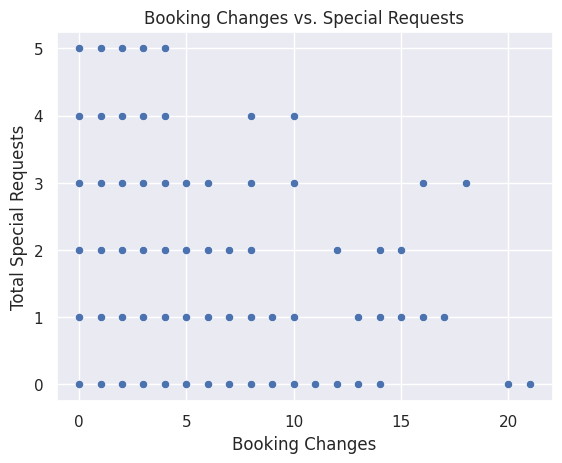

In [81]:
correlation = df['booking_changes'].corr(df['total_of_special_requests'])
correlation

sns.scatterplot(data=df, x='booking_changes', y='total_of_special_requests')
plt.title('Booking Changes vs. Special Requests')
plt.xlabel('Booking Changes')
plt.ylabel('Total Special Requests')

The correlation between booking changes and total special requests is only 0.053, indicating almost no relationship. This suggests that modifying a booking does not necessarily lead to more special requests.

Info:Hotels should focus on actual guest preferences and requests rather than assuming higher service demand from guests who make booking changes.

4. What is the seasonal impact on booking cancellations?

In [82]:
monthly_cancellations = df.groupby('arrival_date_month')['is_canceled'].mean().sort_values(ascending=False)
monthly_cancellations


,is_canceled
arrival_date_month,
June,0.414572
April,0.407972
May,0.396658
September,0.391702
October,0.380466
August,0.377531
July,0.374536
December,0.349705
February,0.334160


Analyzing monthly cancellation rates shows a seasonal trend: cancellations peak in June, April, and May, while winter months like January and November have lower rates.

Hotels can use this insight to optimize overbooking strategies, plan promotions, and manage resources effectively during high-risk periods.

5. How does the booking lead time distribution vary between different market segments?

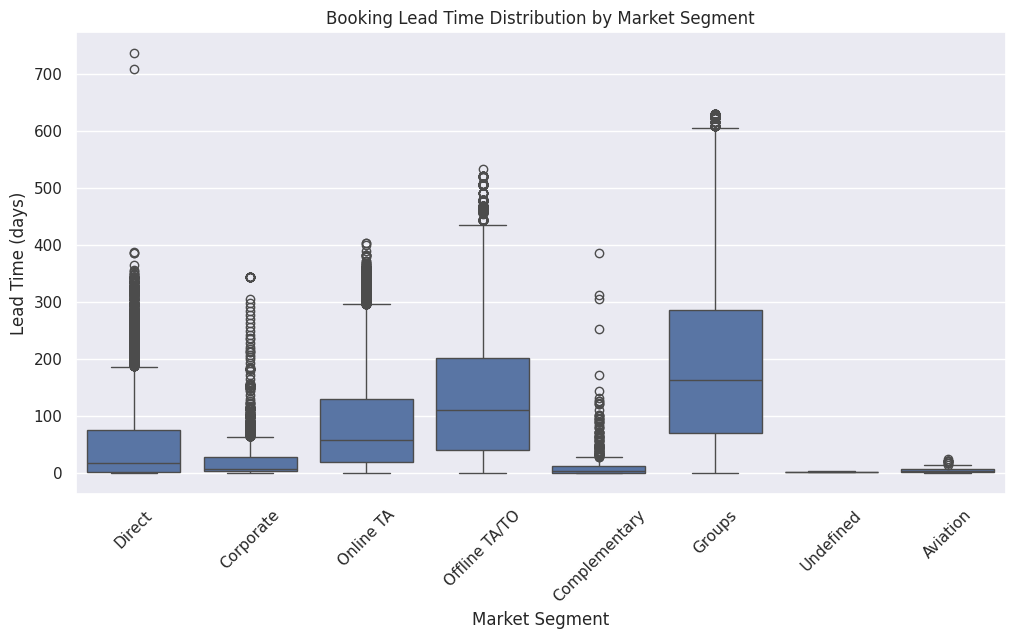

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(x='market_segment', y='lead_time', data=df)
plt.title('Booking Lead Time Distribution by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Lead Time (days)')
plt.xticks(rotation=45)
plt.show()

*  Group bookings show the widest spread and highest lead times, indicating that groups tend to book much earlier, but with high variability.

*  TA/TO and Online TA bookings also have relatively large lead time distributions, suggesting mixed behavior between early planners and last-minute bookers.

*  Direct and Corporate bookings have more consistent and moderate lead times, indicating more predictable booking behavior.

*  Complementary and Aviation segments show the smallest spread, meaning bookings are more uniform and often made closer to the arrival date.

**Metric**

1. Booking Lead Time

In [84]:
avg_lead_time = df['lead_time'].mean()
avg_lead_time


np.float64(104.01141636652986)

On average, guests book 104 days before arrival, indicating the typical planning horizon of customers

2. Cancellation Rate

In [85]:
cancellation_rate = df['is_canceled'].mean() * 100
cancellation_rate

np.float64(37.041628277075134)

Approximately 37% of bookings are canceled, highlighting the level of uncertainty in reservations

3. Occupancy Rate

In [86]:
df['total_nights'] = (
    df['stays_in_week_nights'] + df['stays_in_weekend_nights']
)

avg_stay_duration = df['total_nights'].mean()
avg_stay_duration


np.float64(3.4279001591423066)

Guests stay an average of 4 nights, which helps estimate room usage and demand patterns

4. Special Requests Frequency

In [87]:
avg_special_requests = df['total_of_special_requests'].mean()
avg_special_requests


np.float64(0.5713627607002262)

Each booking makes an average of 0.57 special requests, indicating customer service expectations.

5. Average Daily Rate

In [88]:
avg_adr = df['adr'].mean()
avg_adr


np.float64(101.83112153446686)

The average daily rate across all bookings is 101, reflecting pricing strategy effectiveness.

6. Total Revenue

In [89]:
df['estimated_revenue'] = df['adr'] * df['total_nights']
total_revenue = df['estimated_revenue'].sum()
total_revenue


np.float64(42723497.53)

Estimated total revenue of 42723498, based on ADR and length of stay

**Summary**

This analysis explored hotel booking data to understand booking behavior, cancellations, guest preferences, and revenue patterns.


*  Booking Behavior

Bookings show strong seasonality, with peak demand in August, July, and May.

Most guests book several weeks in advance, indicating the importance of lead time in planning demand.

*   Cancellations

Cancellation rates are higher in City Hotels compared to Resort Hotels.

Bookings made with longer lead times are more likely to be canceled.

Non-refundable deposits significantly reduce cancellations.

Guests with more special requests tend to cancel less.

*   Guest Preferences

On average, guests make less than one special request per booking.

Special requests are associated with higher ADR and lower cancellation risk.

New guests stay longer on average than repeated guests.

*   Revenue & Pricing

City Hotels generate higher ADR than Resort Hotels.

ADR increased steadily from 2015 to 2017, showing positive revenue growth.

Online and Direct booking channels generate higher ADR than corporate and group bookings.

ADR increases with the number of adults, children, and special requests.

**Conclusion**

The analysis shows that seasonality, lead time, booking conditions, and guest behavior strongly influence cancellations and revenue. By adjusting pricing strategies, deposit policies, and personalized guest services, hotels can reduce cancellations, improve guest satisfaction, and maximize revenue.